In [81]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from scipy import linalg

In [148]:
#given points and neighbors return adjacency matrix
def neighbors(points,neighbors):
    nbrs=NearestNeighbors(n_neighbors=neighbors+1).fit(points) # nearest is always the same point
    distances,indices = nbrs.kneighbors(points)
    adjacency_matrix=np.zeros((np.shape(points)[0],np.shape(points)[0]))
    #building the matrix
    for i in range(len(indices)):
        for index in indices[i]:
            adjacency_matrix[i][index]=1
            adjacency_matrix[index][i]=1

    np.fill_diagonal(adjacency_matrix,0)
    return adjacency_matrix


In [120]:
#given the adjacency matrix return the laplacian matrix and the diagonal matrix
def laplacian_matrix(adjacency_matrix):
    # extracts the diagonal and create diagonal matrix
    diagonal_matrix=np.zeros((np.shape(adjacency_matrix)[0],np.shape(adjacency_matrix)[0]))
    diagonal_sum=np.sum(adjacency_matrix,axis=1)
    np.fill_diagonal(diagonal_matrix,diagonal_sum)
    laplacian=diagonal_matrix-adjacency_matrix
    return laplacian,diagonal_matrix



In [109]:
#given the laplacian matrix find the eigen vectors
def get_eigen_vectors(laplacian,diagonal_matrix):
    # matrix is D^-1L
    eigen_vals,eigen_vectors=linalg.eigh (laplacian,diagonal_matrix)
    eigen_vectors=eigen_vectors[:,1:] # drop zero eigen vector
    return eigen_vectors

In [106]:
# return the points after the embedding
def spectral_embedding(eigen_vectors,dim):
    # use only the dim amount of eigen_vectors
    dim_vectors=eigen_vectors[:,:dim]
    return dim_vectors


In [79]:
#function from scikit learn
def test():
    W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0]])
    y = manifold.spectral_embedding(adjacency=W,
                                n_components=1,
                                norm_laplacian=False,
                                drop_first=True,
                                eigen_solver='lobpcg')

    print(y)
test()

[[ 0.        ]
 [-0.57735027]
 [ 0.78867513]
 [-0.21132487]]


In [80]:
# test my method
def first_test():
    W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0]])
    laplacian,diagonal_matrix=laplacian_matrix(W)
    eigen_vectors=get_eigen_vectors(laplacian,diagonal_matrix)
    return eigen_vectors[:,1]

first_test()

eigen vals:
 [1.11022302e-16 1.00000000e+00 1.00000000e+00 2.00000000e+00]
eigen vectors: 
 [[-0.40824829  0.          0.          0.40824829]
 [-0.40824829 -0.57735027 -0.57735027 -0.40824829]
 [-0.40824829  0.78867513 -0.21132487 -0.40824829]
 [-0.40824829 -0.21132487  0.78867513 -0.40824829]]


array([ 0.        , -0.57735027, -0.21132487,  0.78867513])

In [126]:
def dimension_reduction(dataset,n_neighbors,dim):
    adjacency_matrix=neighbors(dataset,n_neighbors)
    laplacian,diagonal_matrix=laplacian_matrix(adjacency_matrix)
    print(diagonal_matrix)
    print("this is adj matrix: \n",adjacency_matrix)
    eigen_vectors=get_eigen_vectors(laplacian,diagonal_matrix)
    dim_vectors=spectral_embedding(eigen_vectors,dim)
    return dim_vectors


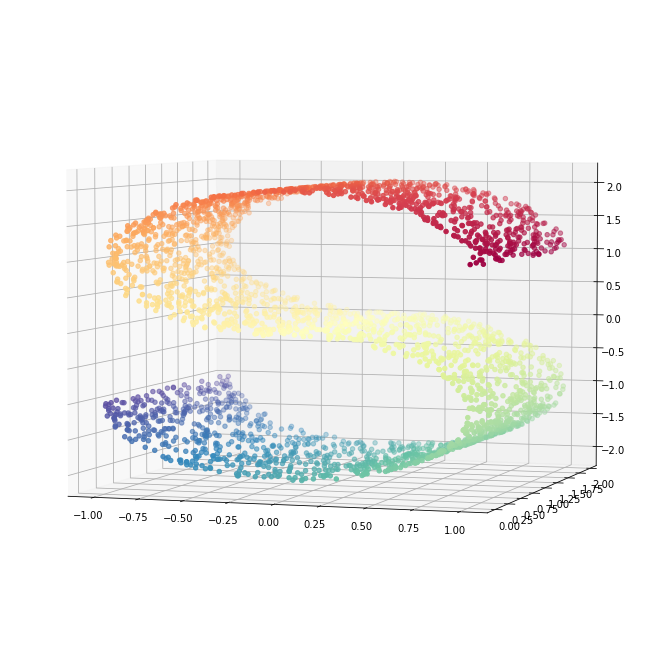

In [149]:
# Define the number of points to consider.
n_points = 3000

# Get the data and color map.
S_curve, S_colors = datasets.make_s_curve(n_points, random_state=0)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors,
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

[[7. 0. 0. ... 0. 0. 0.]
 [0. 6. 0. ... 0. 0. 0.]
 [0. 0. 8. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 8. 0. 0.]
 [0. 0. 0. ... 0. 7. 0.]
 [0. 0. 0. ... 0. 0. 8.]]
this is adj matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


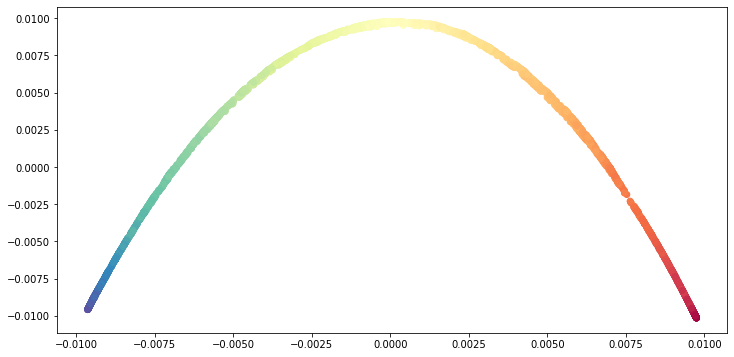

In [150]:
#S_curve implentation
S_2dim=dimension_reduction(S_curve,6,2)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_2dim[:, 0], S_2dim[:, 1],
           c=S_colors,
           cmap=plt.cm.Spectral);

[[2582.    0.    0. ...    0.    0.    0.]
 [   0. 1540.    0. ...    0.    0.    0.]
 [   0.    0. 1700. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1557.    0.    0.]
 [   0.    0.    0. ...    0. 1500.    0.]
 [   0.    0.    0. ...    0.    0. 1548.]]
this is adj matrix: 
 [[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]]


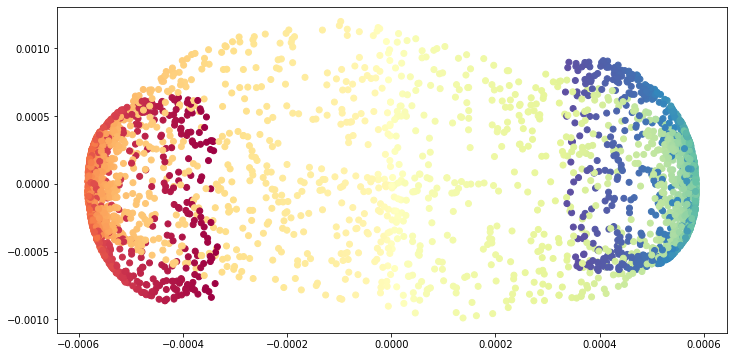

In [151]:
S_2dim=dimension_reduction(S_curve,1500,2)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_2dim[:, 0], S_2dim[:, 1],
           c=S_colors,
           cmap=plt.cm.Spectral);